In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")
sns.set_context("talk")

In [3]:
str2date = lambda x: datetime.strptime(x.decode("utf-8"), '%Y-%m-%dT%H:%M')

data = {}

data["OSTSEE_GREIFSWALD-WIECK"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_GREIFSWALD-WIECK.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

data["OSTSEE_LT+KIEL"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_LT+KIEL.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

data["OSTSEE_FLENSBURG"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_FLENSBURG.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

In [4]:
data["OSTSEE_GREIFSWALD-WIECK"]

array([(datetime.datetime(2018, 1, 16, 0, 1),  452.),
       (datetime.datetime(2018, 1, 16, 0, 2),  452.),
       (datetime.datetime(2018, 1, 16, 0, 3),  452.), ...,
       (datetime.datetime(2018, 2, 16, 23, 58),   nan),
       (datetime.datetime(2018, 2, 16, 23, 59),   nan),
       (datetime.datetime(2018, 2, 17, 0, 0),   nan)],
      dtype=[('timestamp', 'O'), ('sealevelinm', '<f8')])

In [5]:
def calculate_anomalies(time_series):
    time_series = np.ma.masked_invalid(time_series)
    return time_series - time_series.mean(axis=0)

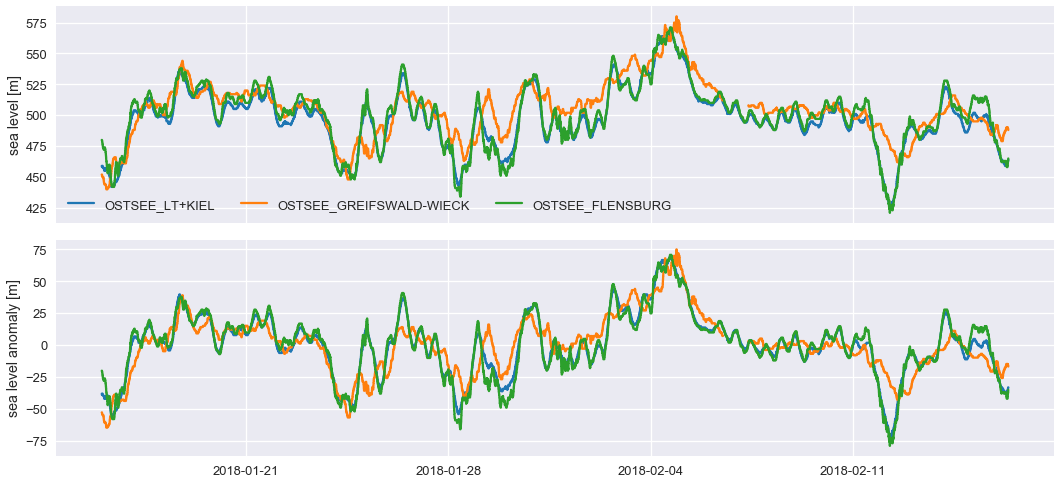

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

stations = list(data.keys())

for station, station_data in data.items():
    ax[0].plot(station_data["timestamp"], 
               station_data["sealevelinm"],
               label=station);
    ax[1].plot(station_data["timestamp"], 
               calculate_anomalies(station_data["sealevelinm"]),
               label=station);

ax[0].set_ylabel("sea level [m]")
ax[1].set_ylabel("sea level anomaly [m]")

ax[0].legend(loc=0, ncol=3);

fig.tight_layout()